# Project @@ Plotting geographical data (foreign firm percentage per country)

In [469]:
import pandas as pd, numpy as np, geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
# Notes: Shape files need to be imported to accompanying files (also avoid changing file names)

In [470]:
# Importing the shape file
# fp = r'C:\Users\Lukas\Desktop\NUTS_RG_01M_2016_4326_LEVL_2.shp'
shapefile = (r'C:\Users\Lukas\Desktop\scripts\Econometrics basemap\Shapefile\CNTR_RG_01M_2016_4326.shp')

# Reading the shape file and Assigning it to a variable
map_df = gpd.read_file(shapefile)

In [628]:
# Show top 3 results
map_df.head(1)

# Print all:
# print(map_df.to_string())

,CNTR_ID,CNTR_NAME,NAME_ENGL,ISO3_CODE,FID,geometry
0,AE,Ø§ÙØ¥Ù Ø§Ø±Ø§Øª Ø§ÙØ¹Ø±Ø¨ÙØ© Ø§ÙÙ ØªØ­Ø¯Ø©,United Arab Emirates,ARE,AE,"(POLYGON ((51.59056 24.24297, 51.59787 24.2794..."


In [473]:
# Preparing the data to plot
cs = pd.read_csv(r'C:\Users\Lukas\Desktop\scripts\Econometrics basemap\CountryandForeignF11.csv')

# Create a country duplicate to overcome the later issue of country label not callable
cs['CountryName'] = cs['Country']

In [627]:
# Visualize the dataset with countries and percentages
cs.head(1)

,Country,ForeignFperc,CountryName
0,Albania,0.080374,Albania


In [476]:
# join the geodataframe with the cleaned up csv dataframe
merged_df = map_df.set_index('NAME_ENGL').join(cs.set_index('Country'))

# Importing points
p = (r'C:\Users\Lukas\Desktop\scripts\Econometrics basemap\Points\CNTR_LB_2016_4326.shp')
points = gpd.read_file(p)

# Dropping unneeded columns
points = points.drop(['CNTR_ID', 'FID', 'ISO3_CODE', 'CNTR_NAME'], axis=1)


# Adding country labels
# Create a seperate dataframe (copy) and then drop the unneeded countries
points = points.drop(points[(points.NAME_ENGL != 'Albania') & 
                            (points.NAME_ENGL != 'Bulgaria') &
                            (points.NAME_ENGL != 'Croatia') &
                            (points.NAME_ENGL != 'Czechia') &
                            (points.NAME_ENGL != 'Estonia') &
                            (points.NAME_ENGL != 'Hungary') &
                            (points.NAME_ENGL != 'Latvia') &
                            (points.NAME_ENGL != 'Lithuania') &
                            (points.NAME_ENGL != 'Macedonia') &
                            (points.NAME_ENGL != 'Moldova') &
                            (points.NAME_ENGL != 'Montenegro') &
                            (points.NAME_ENGL != 'Poland') &
                            (points.NAME_ENGL != 'Romania') &
                            (points.NAME_ENGL != 'Serbia') &
                            (points.NAME_ENGL != 'Slovakia') &
                            (points.NAME_ENGL != 'Slovenia') &
                            (points.NAME_ENGL != 'Ukraine')
                           ].index) 
# df = df.drop(df[(df.score < 50) & (df.score > 20)].index)
                            
countryname = points['NAME_ENGL']
points["x"] = points.centroid.x
points["y"] = points.centroid.y

# Making pandas dataframe into a list
dflist = points.values.tolist()

# Initializing empty list that will later be apended to
xlist = []
ylist = []
countrylist = []
tempvar = -1

# Just a list of countries used for further purposes (if needed)
dflistcopy = ['Albania','Bulgaria','Croatia','Czechia','Estonia','Hungary','Latvia','Lithuania','North Macedonia',
                    'Moldova','Montenegro','Poland','Romania','Serbia','Slovakia','Slovenia','Ukraine']

# Extracting x and y columns into seperate lists
for i in dflist:
    tempvar += 1
    xlist.append(dflist[tempvar][2])
    ylist.append(dflist[tempvar][3])
    countrylist.append(dflist[tempvar][0])
    
tempvar2 = -1
xlistnew = []
for n in xlist:
    tempvar2 += 1
    xlistnew.append(xlist[tempvar2] - 1)
    
points.head(1)

In [ ]:
# Dropping unneeded columns
merged_df = merged_df.drop(['CNTR_ID', 'FID', 'ISO3_CODE', 'CNTR_NAME'], axis=1)

# alternatively, delete columns using the columns parameter of drop
# data = data.drop(columns="area")

# Dropping unneeded rows
# df1 = df.replace(np.nan, '', regex=True)
merged_df = merged_df.replace(np.nan, 0)

# Renaming column
merged_df = merged_df.rename(index=str, columns={'NAME_ENGL	': 'Country'})

# Convert percentages from for eg. 0.14 to 14
merged_df['ForeignFperc1'] = merged_df['ForeignFperc'] * 100 

# Making one country different value for chloropeth contrast
merged_df.at['Angola', 'ForeignFperc1'] = -1.5


In [ ]:
merged_df.head(1)

# Count if all countries are present and decribe data in general
merged_df.describe() # Kosovo is missing (EU website doesn't have it)

(6, 43)

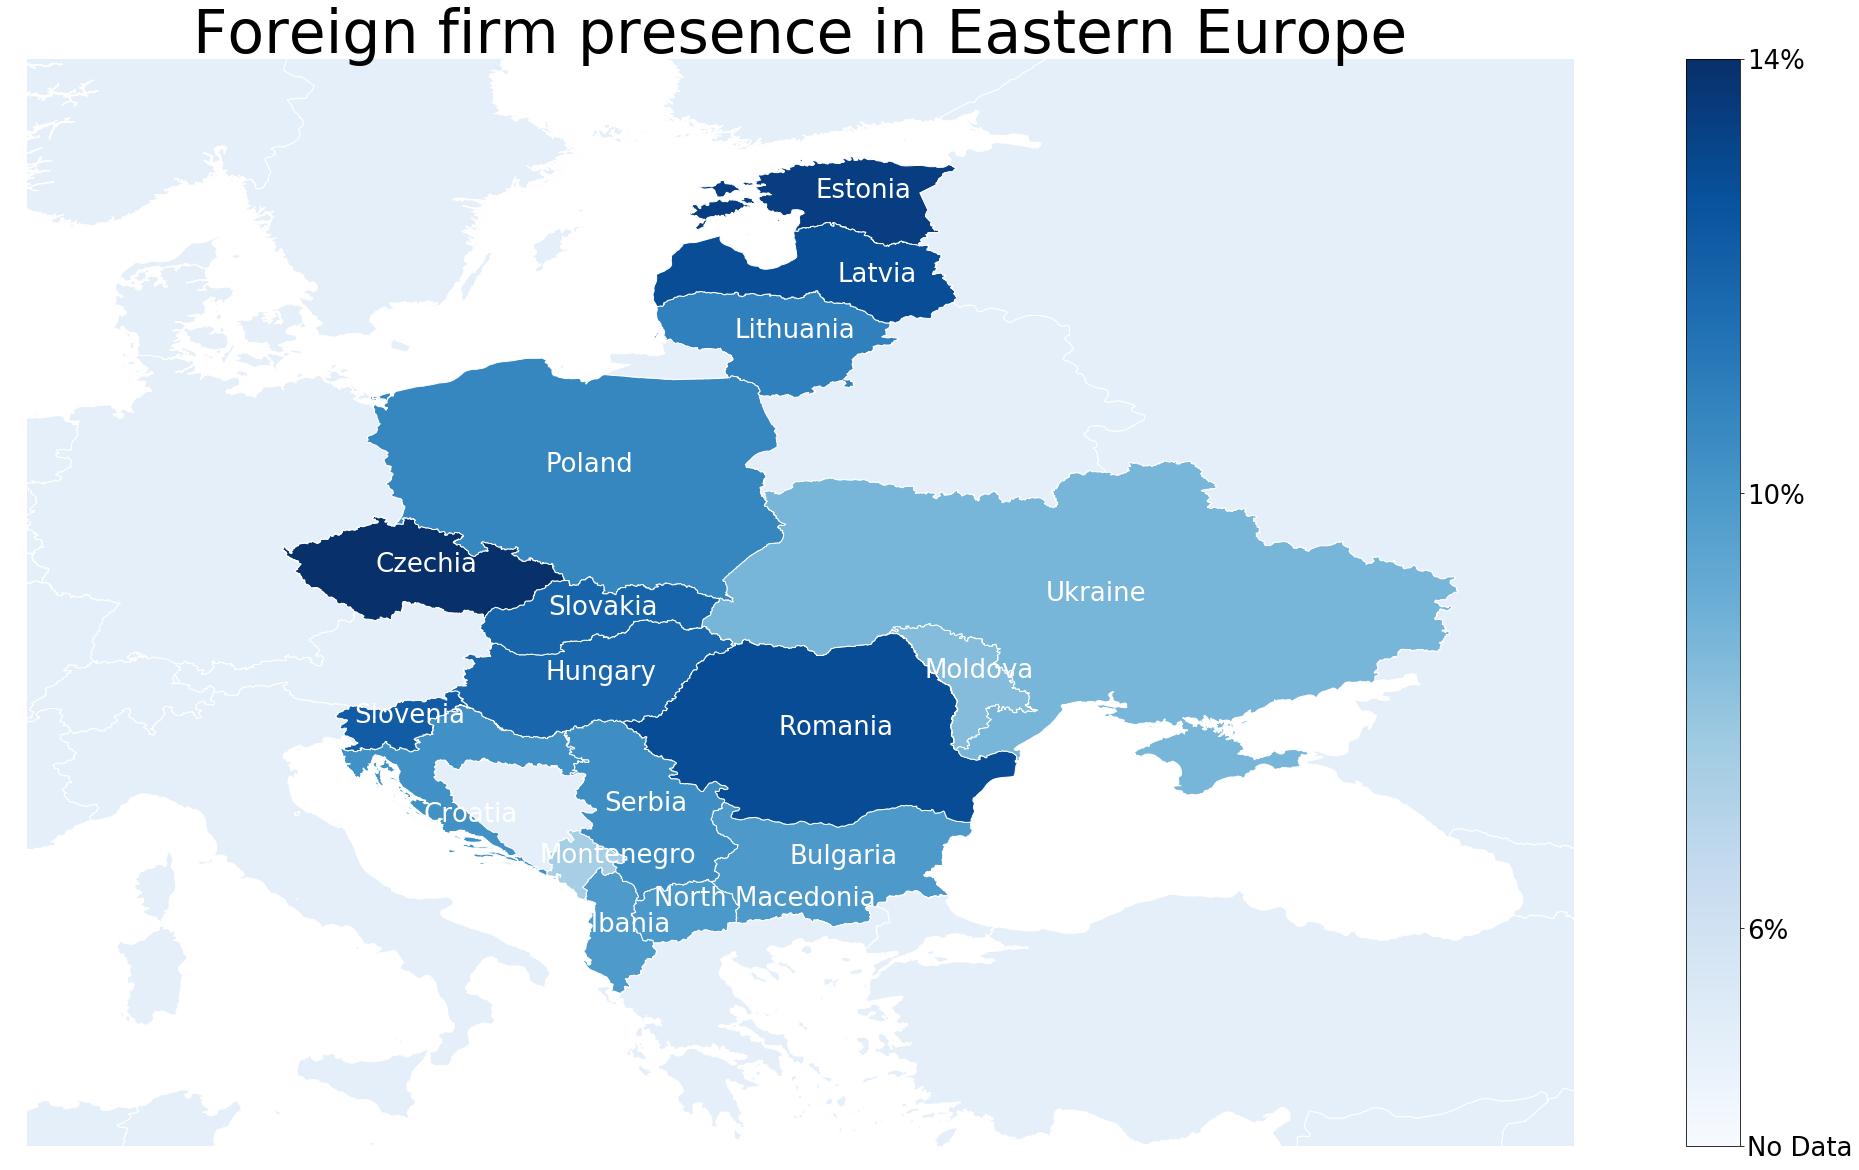

In [625]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'ForeignFperc1'
# variable = merged_df['ForeignFperc1']

# set the range for the choropleth
vmin, vmax = 4, 14

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(40, 20))



# Create map
merged_df.plot(column=variable, cmap='Blues', linewidth=1, ax=ax, edgecolor='White')
# merged_df.plot(figsize=(10, 10), column=variable, cmap='Blues', linewidth=1, edgecolor='White')


# Plotting country names
tempvar1 = -1
for i in countrylist:
    tempvar1 += 1
    xlistvar = xlistnew[tempvar1]
    ylistvar = ylist[tempvar1]
    countrylistvar = countrylist[tempvar1]
    plt.text(xlistvar, ylistvar, countrylistvar, fontdict={'fontsize': '26',
                       'fontweight' : '13', 'color': 'white'})

# Adding north macedonia manually
plt.text(21, 41.75, 'North Macedonia', fontdict={'fontsize': '26','fontweight' : '13', 'color': 'white'})

# Removing axis
plt.axis('off')

# Add title
ax.set_title('Foreign firm presence in Eastern Europe', \
             fontdict={'fontsize': '60',
                       'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=26)
# cbar = fig.colorbar(sm, format='%% Percent')

cbar.set_ticks([4, 6, 10, 14])
cbar.set_ticklabels(['No Data', '6%', '10%', '14%'])

# map_df.plot(figsize=(40,40)) # Plotting the map (plot first)
plt.ylim(36, 62) # Setting the size of x and y axies (define limits later)
plt.xlim(6, 43)



In [629]:
# Exporting a PNG image
fig.savefig('Foreign_Presence_Map.png', dpi=400)